In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
np.random.seed(121)

n = 1000
std = 0.6

banana = pd.DataFrame({
    'length': np.random.normal(8,std,n),
    'width': np.random.normal(4,std,n),
    'class': np.zeros(n,dtype='int'),
})

apple = pd.DataFrame({
    'length': np.random.normal(6,std,n),
    'width': np.random.normal(6,std,n),
    'class': np.ones(n,dtype='int'),
})

fruits = pd.concat([banana,apple])



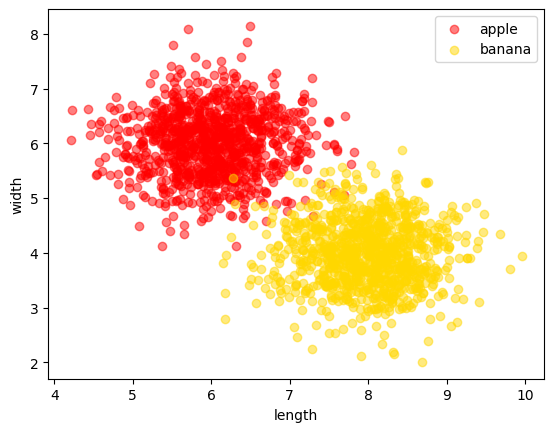

In [89]:
plt.scatter(apple['length'],apple['width'],label='apple',alpha=.5,c='r')
plt.scatter(banana['length'],banana['width'],label='banana',alpha=.5,c='gold')
plt.legend()
plt.xlabel('length')
plt.ylabel('width')
plt.savefig('output/apple_banana_1.png')
plt.show()


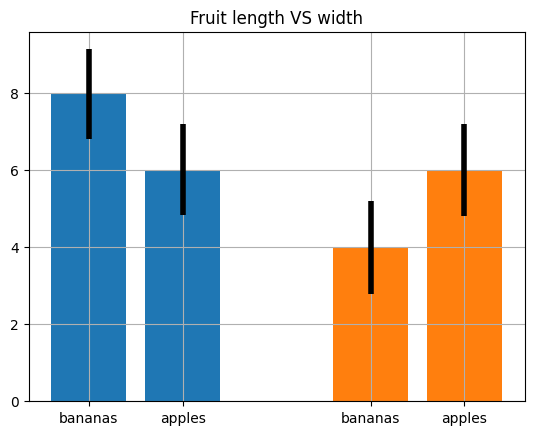

In [90]:
# 0 = banana; 1 = apple

labels = ['bananas', 'apples', 'bananas', 'apples']
x = [1, 1.5, 2.5, 3.0]
height = [fruits.loc[fruits['class'] == 0, 'length'].mean(),
          fruits.loc[fruits['class'] == 1, 'length'].mean(),
          fruits.loc[fruits['class'] == 0, 'width'].mean(),
          fruits.loc[fruits['class'] == 1, 'width'].mean()]

yerr = [2*fruits.loc[fruits['class'] == 0, 'length'].std(),
        2*fruits.loc[fruits['class'] == 1, 'length'].std(),
        2*fruits.loc[fruits['class'] == 0, 'width'].std(),
        2*fruits.loc[fruits['class'] == 1, 'width'].std()]
color = ['tab:blue', 'tab:blue', 'tab:orange', 'tab:orange']

plt.bar(x=x,
        height=height,
        color=color,
        width=0.4,
        error_kw={'lw': 4},
        yerr=yerr)
plt.xticks(ticks=x, labels=labels)
plt.title('Fruit length VS width')

plt.grid()
plt.savefig('output/apple_banana_2.png')

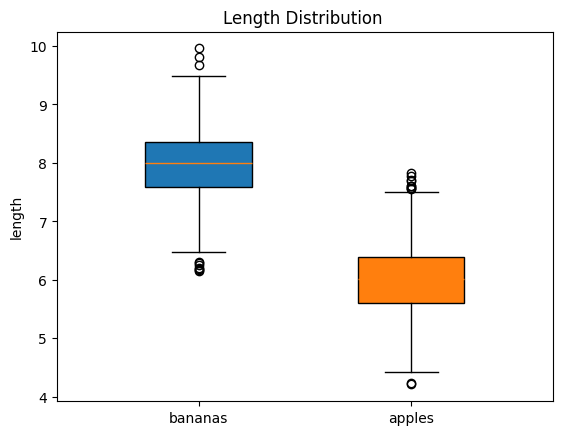

In [91]:
fea = 'length'
plt.boxplot(x=fea, data=fruits.loc[fruits['class'] == 0],
            patch_artist=True, boxprops={'facecolor': 'tab:blue'},
            positions=[0], labels=['bananas'], widths=[0.15])
plt.boxplot(x=fea, data=fruits.loc[fruits['class'] == 1],
            patch_artist=True, boxprops={'facecolor': 'tab:orange'},
            positions=[0.3], labels=['apples'], widths=[0.15])
plt.ylabel('length')
plt.xlim(-0.2, 0.5)
plt.title('Length Distribution ')
plt.savefig('output/apple_banana_3.png')


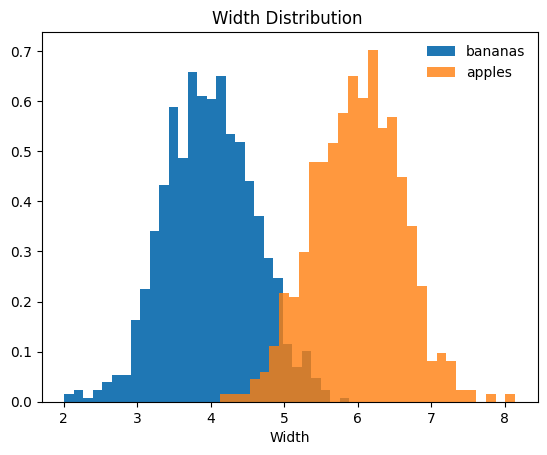

In [92]:
fea = 'width'

plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0],
         bins=30, density=True, color='tab:blue', label='bananas',)
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1],
         bins=30, density=True, color='tab:orange', label='apples', alpha=0.8)
plt.legend(frameon=False)
plt.title('Width Distribution ')
plt.xlabel('Width')
plt.savefig('output/apple_banana_4.png')

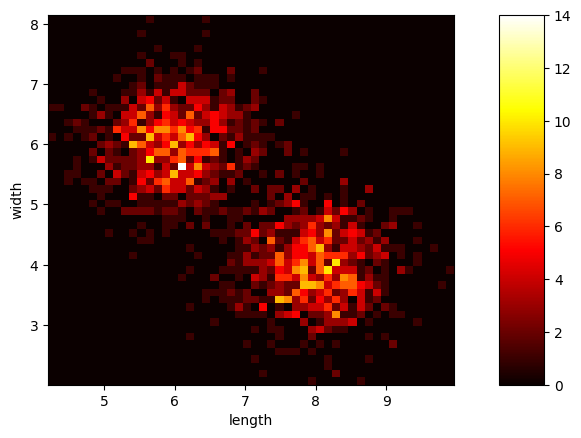

In [93]:
fig, (ax, cax) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [0.9, 0.1]})
_, _, _, mappable = ax.hist2d(
    x='length', y='width', bins=50, data=fruits, cmap=plt.cm.hot)
ax.set_xlabel('length')
ax.set_ylabel('width')

plt.colorbar(mappable=mappable, cax=cax, ax=ax)
plt.savefig('output/apple_banana_5.png')

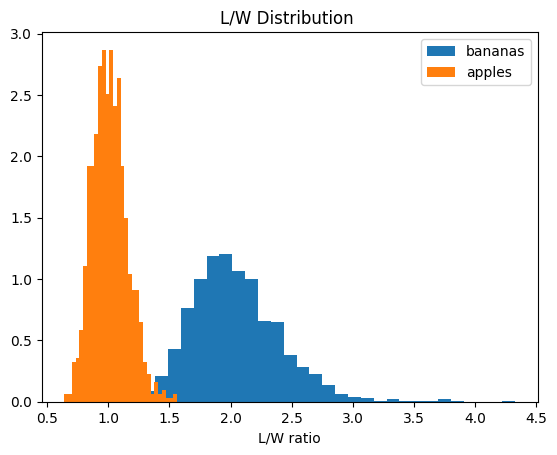

In [94]:
fea = 'L/W'
fruits[fea] = fruits['length']/fruits['width']

plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0],
         bins=30, density=True, color='tab:blue', label='bananas',)
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1],
         bins=30, density=True, color='tab:orange', label='apples',)
plt.legend()
plt.title('L/W Distribution ')
plt.xlabel('L/W ratio')
plt.savefig('output/apple_banana_6.png')


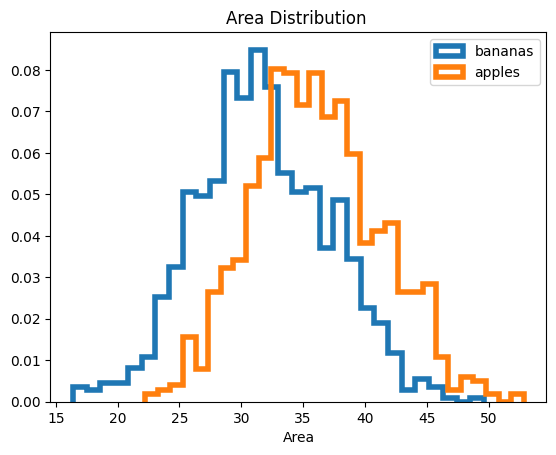

In [95]:
fea = 'area'
fruits[fea] = fruits['length']*fruits['width']
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0], histtype='step', lw=4,
         bins=30, density=True, color='tab:blue', label='bananas')
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1], histtype='step', lw=4,
         bins=30, density=True, color='tab:orange', label='apples')
plt.title('Area Distribution ')
plt.legend()
plt.xlabel('Area')
plt.savefig('output/apple_banana_7.png')

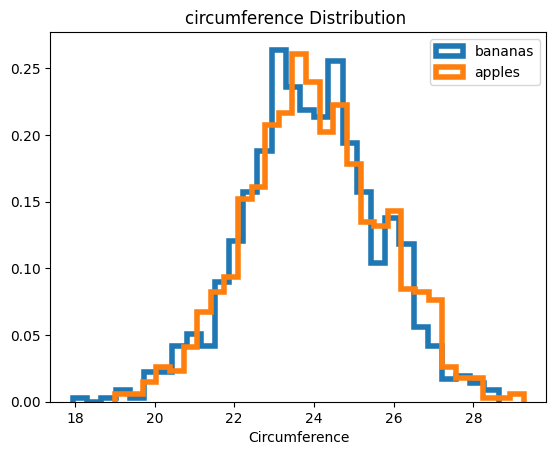

In [96]:
fea = 'circumference'
fruits[fea] = 2*(fruits['length']+fruits['width'])
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0], histtype='step', lw=4,
         bins=30, density=True, color='tab:blue', label='bananas')
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1], histtype='step', lw=4,
         bins=30, density=True, color='tab:orange', label='apples')
plt.title('circumference Distribution ')
plt.legend()
plt.xlabel('Circumference')
plt.savefig('output/apple_banana_8.png')

In [85]:
from scipy import stats
fea = 'L/W'
fruits[fea] = fruits['length']/fruits['width']
stats.ttest_ind(fruits.loc[fruits['class'] == 0, fea],
                fruits.loc[fruits['class'] == 1, fea])

TtestResult(statistic=82.43842566108299, pvalue=0.0, df=1998.0)

In [86]:
fea = 'area'
fruits[fea] = fruits['length']*fruits['width']
stats.ttest_ind(fruits.loc[fruits['class'] == 0, fea],
                fruits.loc[fruits['class'] == 1, fea])

TtestResult(statistic=-18.339795548775278, pvalue=1.4737736564093967e-69, df=1998.0)

In [87]:
fea = 'circumference'
fruits[fea] = 2*(fruits['length']+fruits['width'])
stats.ttest_ind(fruits.loc[fruits['class'] == 0, fea],
                fruits.loc[fruits['class'] == 1, fea])

TtestResult(statistic=-1.3170522756675043, pvalue=0.1879721312693096, df=1998.0)